In [24]:
from urllib.request import urlopen
import pandas as pd
import plotly.express as px
import json
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = pd.read_csv("data/processed_communities.csv")
state_code = pd.read_csv("data/raw_data/us-state-code.csv")
new_df = pd.merge(df, state_code, left_on='state', right_on='stname', how='left')
new_df.rename(columns={' stusps':'code'}, inplace=True)

geometry = [Point(xy) for xy in zip(new_df['longitude'], new_df['latitude'])]
gdf = GeoDataFrame(new_df, geometry=geometry) 



In [9]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

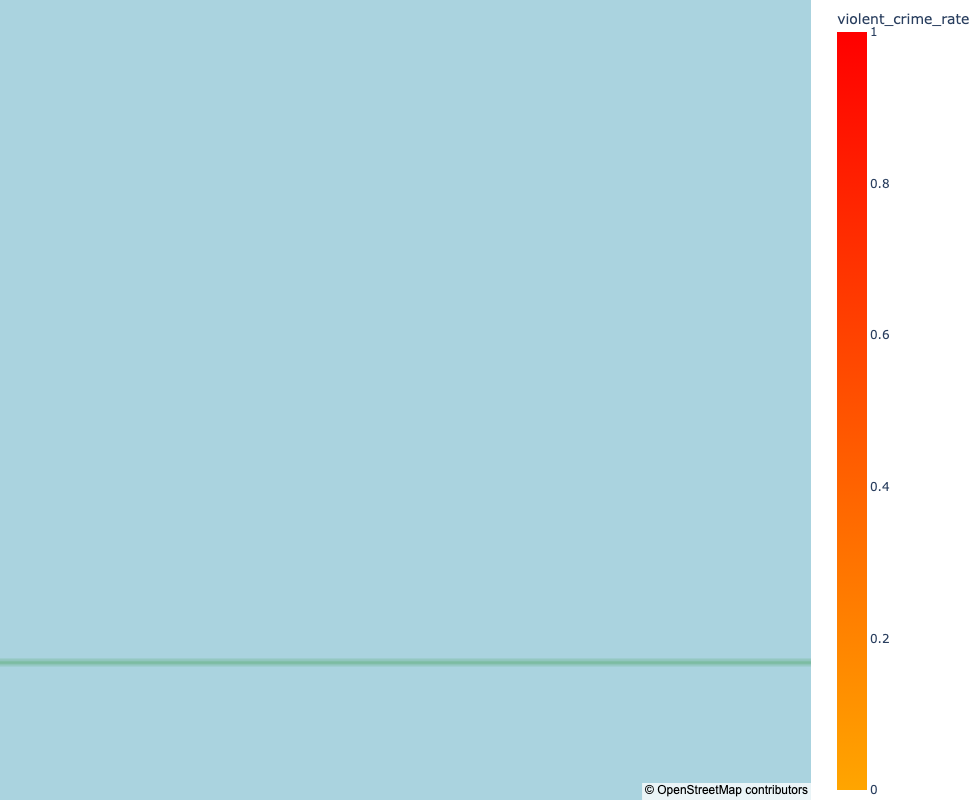

In [14]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="state", 
                        hover_data=["state", "area"],
                        color="violent_crime_rate",
                        color_continuous_scale=color_scale,
                        size="violent_crime_rate",
                        zoom=2.5, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [15]:
gdf.head(3)

,area,type,state,latitude,longitude,fold,population,householdsize,racepctblack,racePctWhite,...,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,violent_crime_rate,stname,st,stusps,geometry
0,Sheffield,city,Alabama,34.765089,-87.698641,2,0.00,0.31,0.46,0.63,...,NaN,NaN,NaN,0.0,NaN,0.10,Alabama,1,AL,POINT (-87.69864 34.76509)
1,Auburn,city,Alabama,32.609857,-85.480783,1,0.04,0.37,0.32,0.70,...,NaN,NaN,NaN,0.0,NaN,0.15,Alabama,1,AL,POINT (-85.48078 32.60986)
2,Daphne,city,Alabama,30.603525,-87.903605,7,0.00,0.39,0.31,0.75,...,NaN,NaN,NaN,0.0,NaN,0.05,Alabama,1,AL,POINT (-87.90360 30.60353)


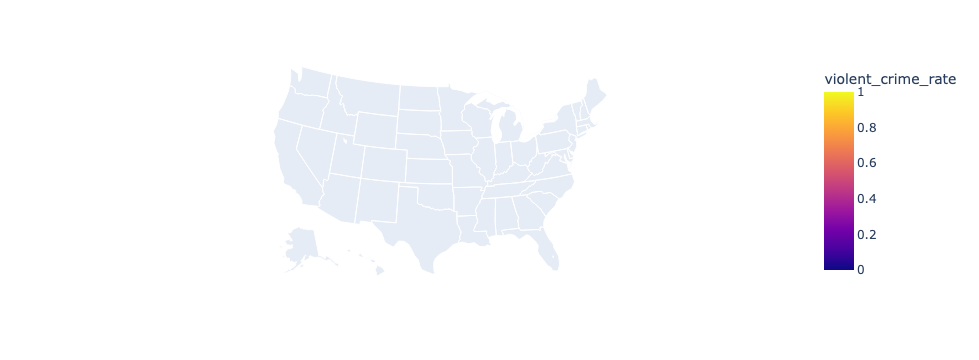

In [29]:
fig = px.choropleth(gdf, locations='code',
                    locationmode="USA-states", color='violent_crime_rate', scope="usa")
fig.show()

In [ ]:
# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
#     counties = json.load(response)

# fig = px.choropleth_mapbox(df, geojson=counties, locations='violent_crime_rate', color='PopDens',
#                            color_continuous_scale="Viridis",
#                            range_color=(0, 12),
#                            mapbox_style="carto-positron",
#                            zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
#                            opacity=0.5,
#                            labels={'PopDens':'Population Density'}
#                           )
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()